In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# One-hot encoding for the target
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

In [4]:
# Normalize the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model Parameters
input_dim = X_train.shape[1]  # Number of features
hidden_dim = 32              # Hidden layer size
output_dim = y_train.shape[1]  # Number of classes
learning_rate = 0.0032
batch_size = 16
epochs = 40


In [17]:
# Define the Neural Network model
class MultiLayerNN(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultiLayerNN, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(hidden_dim, activation='relu')
        self.output_layer = tf.keras.layers.Dense(output_dim, activation='softmax')

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

In [18]:
# Initialize the model
model = MultiLayerNN(input_dim, hidden_dim, output_dim)

In [19]:
# Define loss function (categorical crossentropy) and optimizer (Adam)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [20]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [21]:
# Train the model using mini-batch SGD
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.5181 - loss: 0.9064 - val_accuracy: 0.5000 - val_loss: 0.7841
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6507 - loss: 0.7100 - val_accuracy: 0.7333 - val_loss: 0.6175
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7251 - loss: 0.5985 - val_accuracy: 0.7333 - val_loss: 0.5168
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6777 - loss: 0.5778 - val_accuracy: 0.7667 - val_loss: 0.4561
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7780 - loss: 0.4929 - val_accuracy: 0.8000 - val_loss: 0.4171
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8467 - loss: 0.4332 - val_accuracy: 0.8333 - val_loss: 0.3872
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8111 - loss: 0.4308 - val_accuracy: 0.8333 - val_loss: 0.3631
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7958 - loss: 0.4563 - val_accuracy: 0.8333 - val_loss: 0.3404

In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.0619
Test Accuracy: 1.0000


In [23]:
# Predict on test data
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [24]:
# Print the first 5 predictions
print("Predictions:", predicted_classes[:5])
print("True Labels:", true_classes[:5])


Predictions: [1 0 2 1 1]
True Labels: [1 0 2 1 1]


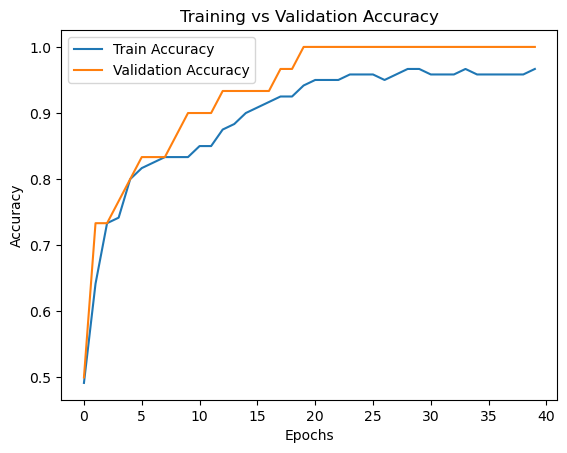

In [25]:
# Plot training vs validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
